Accuracy: 0.919047619047619
Precision: [1.         0.83870968 0.88461538 1.         1.         1.
 0.73529412]
Recall: [0.96666667 0.86666667 0.76666667 1.         1.         1.
 0.83333333]
Prediction =  ['SKY']


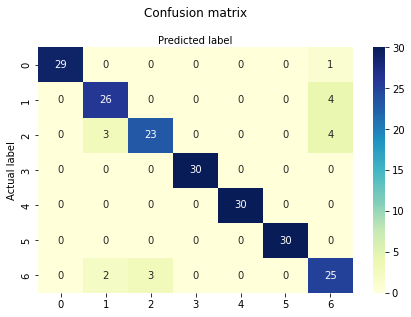

In [6]:
#import pandas 
import pandas as pd 
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split 
# load dataset 

data_test = pd.read_csv('Test_Data.csv')
data_train = pd.read_csv('Train_Data.csv')
data_test.head();
data_train.head();


#split dataset in features and target variable 
#  split X and y into training and testing sets 
X_train = data_train.iloc[:,1:20 ].values
X_test=data_test.iloc[:,1:20].values
y_train = data_train.iloc[:,0].values
y_test=data_test.iloc[:,0].values



from sklearn import preprocessing
# Use of feature scaling for quick convergence 
# You may use minmax scaler or standard scaler 
#min_max_scaler = preprocessing.MinMaxScaler() 
# Using standard scaler for feature scaling 
scaler = preprocessing.StandardScaler().fit(X_train) 
scaler1 = preprocessing.StandardScaler().fit(X_test) 
X_train_standard = scaler.fit_transform(X_train) 
X_test_standard = scaler1.transform(X_test) 



# X_train_standard=preprocessing.normalize(X_train)
# X_test_standard=preprocessing.normalize(X_test)




# import the class 
from sklearn.linear_model import LogisticRegression 
# instantiate the model (using the default parameters) 
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
# fit the model with data 
logreg.fit(X_train_standard,y_train) 
# Predict output for test set 
y_pred=logreg.predict(X_test_standard) 


# import the metrics class 
from sklearn import metrics 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
cnf_matrix 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
class_names=['BRICKFACE','FOLIAGE','SKY','CEMENT','WINDOW','PATH','GRASS'] # name of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 


# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average=None)) 
print("Recall:",metrics.recall_score(y_test, y_pred,average=None)) 
# Predict output for some unknown sample of the patient  
test_X = np.array([44,79,9,0,0,0.444444,0.34426486,0.7777786,0.4036864,107.74074,93.888885,126.55556,102.77778,-41.555557,56.444443,-14.888889,126.55556,0.2580791,-2.3779652]) 
test_X_standard = scaler1.transform(test_X.reshape(1, -1)) 
pred_y = logreg.predict(test_X_standard) 
print("Prediction = ", pred_y) 

